In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import models
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os
import numpy as np

In [2]:
train_dir = r'C:\Users\deeplove\Desktop\Stanford\CS231\project\datas\train'
validation_dir = r'C:\Users\deeplove\Desktop\Stanford\CS231\project\datas\validation'
test_dir = r'C:\Users\deeplove\Desktop\Stanford\CS231\project\datas\test'

In [3]:
##build baseline VGG model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [4]:
# normalize pictures

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# model fitting
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('VCG_1.h5')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6928 - acc: 0.5230 - val_loss: 0.6813 - val_acc: 0.6240
Epoch 2/100
100/100 [==============================] - 7s 73ms/step - loss: 0.6636 - acc: 0.6115 - val_loss: 0.6437 - val_acc: 0.6370
Epoch 3/100
100/100 [==============================] - 8s 76ms/step - loss: 0.6276 - acc: 0.6450 - val_loss: 0.6250 - val_acc: 0.6510
Epoch 4/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6072 - acc: 0.6720 - val_loss: 0.6383 - val_acc: 0.6070
Epoch 5/100
100/100 [==============================] - 7s 72ms/step - loss: 0.5798 - acc: 0.7030 - val_loss: 0.5849 - val_acc: 0.7030
Epoch 6/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5865 - acc: 0.6810 - val_loss: 0.5783 - val_acc: 0.6850
Epoch 7/100
100/100 [==============================] - 7s 67ms/step - loss: 0.5639 - acc: 0.7100 - val_loss: 0

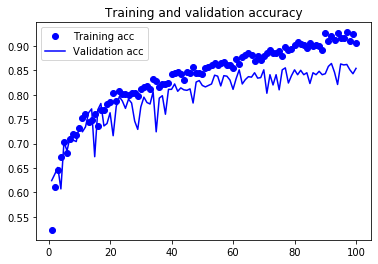

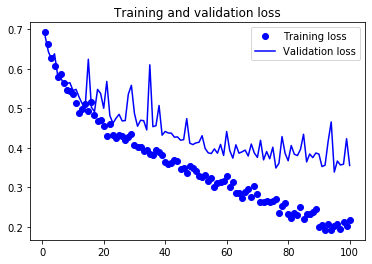

In [5]:
##output plots

acc_1 = history.history['acc']
val_acc_1 = history.history['val_acc']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs_1 = range(1, len(acc_1) + 1)
plt.plot(epochs_1, acc_1, 'bo', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_1, loss_1, 'bo', label='Training loss')
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
##build VGG-4 model with data augmentation and dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [8]:
# data augmentation including shift, shear and zoom

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,              #Width shift
    height_shift_range=0.2,             #height shift
    shear_range=0.2,                    #shear 
    zoom_range=0.2,                     #zoom
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# model fitting

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('VCG_2.h5')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6904 - acc: 0.5203 - val_loss: 0.6690 - val_acc: 0.5663
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6811 - acc: 0.5597 - val_loss: 0.6517 - val_acc: 0.6044
Epoch 3/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6673 - acc: 0.5803 - val_loss: 0.6655 - val_acc: 0.5644
Epoch 4/100
100/100 [==============================] - 20s 196ms/step - loss: 0.6593 - acc: 0.6072 - val_loss: 0.6285 - val_acc: 0.6344
Epoch 5/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6498 - acc: 0.6187 - val_loss: 0.6552 - val_acc: 0.5869
Epoch 6/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6305 - acc: 0.6403 - val_loss: 0.5856 - val_acc: 0.6900
Epoch 7/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6394 - acc: 0.6234 

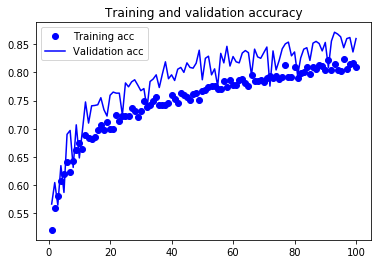

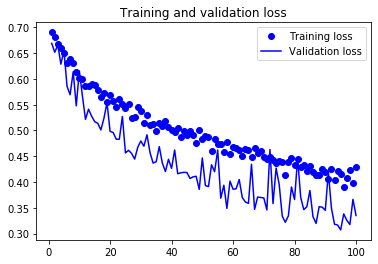

In [9]:
##output plots

acc_2 = history.history['acc']
val_acc_2 = history.history['val_acc']
loss_2 = history.history['loss']
val_loss_2 = history.history['val_loss']

epochs_2 = range(1, len(acc_2) + 1)
plt.plot(epochs_2, acc_2, 'bo', label='Training acc')
plt.plot(epochs_2, val_acc_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
#Transfer learning from VGG16 model

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extarct_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break

    return features, labels


train_features, train_labels = extarct_features(train_dir, 20000)
validation_features, validation_labels = extarct_features(validation_dir, 4000)
test_features, test_labels = extarct_features(test_dir, 1000)

train_features = np.reshape(train_features, (20000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (4000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

# model fitting

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('VCG_3.h5')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 20000 samples, validate on 4000 samples
Epoch 1/100
20000/20000 [==============================] - 4s 191us/sample - loss: 0.3670 - acc: 0.8301 - val_loss: 0.2710 - val_acc: 0.8835
Epoch 2/100
20000/20000 [==============================] - 3s 159us/sample - loss: 0.2633 - acc: 0.8881 - val_loss: 0.2463 - val_acc: 0.8957
Epoch 3/100
20000/20000 [==============================] - 3s 158us/sample - loss: 0.2339 - acc: 0.9020 - val_loss: 0.2324 - val_acc: 0.9043
Epoch 4/100
20000/20000 [==============================] - 3s 159us/sample - loss: 0.2180 - acc: 0.9089 - val_loss: 0.2273 - val_acc: 0.9040
Epoch 5/100
20000/20000 [==============================] - 3s 159us/sample - loss: 0.2066 - acc: 0.9149 - val_loss: 0.2320 - val_acc: 0.9075
Epoch 6/100
20000/20000 [==============================] - 3s 160us/sample - loss: 0.1999 - acc: 0.9190 - val_loss: 0.2

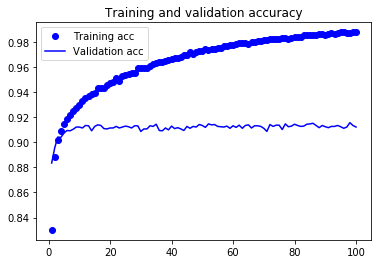

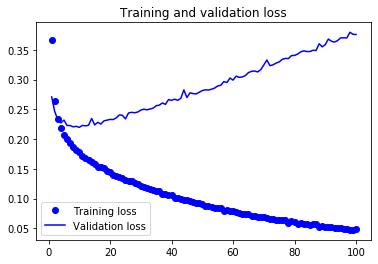

In [12]:
##output plots

acc_3 = history.history['acc']
val_acc_3 = history.history['val_acc']
loss_3 = history.history['loss']
val_loss_3 = history.history['val_loss']

epochs_3 = range(1, len(acc_3) + 1)

plt.plot(epochs_3, acc_3, 'bo', label='Training acc')
plt.plot(epochs_3, val_acc_3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_3, loss_3, 'bo', label='Training loss')
plt.plot(epochs_3, val_loss_3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
#Transfer learning from VGG16 model with data augmentation

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(1, activation='sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#model fitting

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('VCG_4.h5')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 321ms/step - loss: 0.5727 - acc: 0.7188 - val_loss: 0.4192 - val_acc: 0.8338
Epoch 2/100
100/100 [==============================] - 30s 303ms/step - loss: 0.4743 - acc: 0.7884 - val_loss: 0.3449 - val_acc: 0.8581
Epoch 3/100
100/100 [==============================] - 30s 304ms/step - loss: 0.4244 - acc: 0.8050 - val_loss: 0.3021 - val_acc: 0.8831
Epoch 4/100
100/100 [==============================] - 30s 304ms/step - loss: 0.3952 - acc: 0.8250 - val_loss: 0.2883 - val_acc: 0.8850
Epoch 5/100
100/100 [==============================] - 30s 304ms/step - loss: 0.3794 - acc: 0.8297 - val_loss: 0.2770 - val_acc: 0.8831
Epoch 6/100
100/100 [==============================] - 30s 304ms/step - loss: 0.3738 - acc: 0.8384 - val_loss: 0.2631 - val_acc: 0.8944
Epoch 7/100
100/100 [==============================] - 30s 304ms/step - loss: 0.3815 - acc: 0.8222 

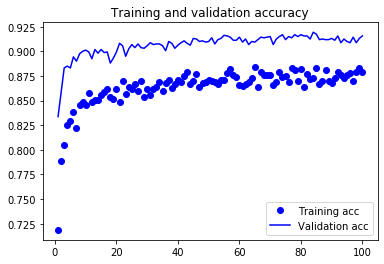

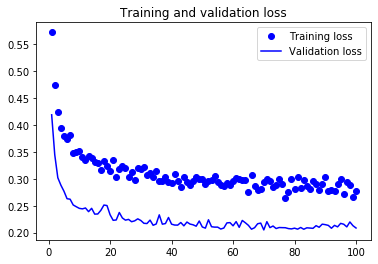

In [14]:
##output plots

acc_4 = history.history['acc']
val_acc_4 = history.history['val_acc']
loss_4 = history.history['loss']
val_loss_4 = history.history['val_loss']

epochs_4 = range(1, len(acc_4) + 1)
plt.plot(epochs_4, acc_4, 'bo', label='Training acc')
plt.plot(epochs_4, val_acc_4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_4, loss_4, 'bo', label='Training loss')
plt.plot(epochs_4, val_loss_4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
#Transfer learning from VGG16 model with fine tune

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = True
set_trainable = False


for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(1, activation='sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

#model fitting

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('VCG_5.h5')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 31s 308ms/step - loss: 0.5295 - acc: 0.7387 - val_loss: 0.3170 - val_acc: 0.8694
Epoch 2/100
100/100 [==============================] - 31s 307ms/step - loss: 0.3678 - acc: 0.8347 - val_loss: 0.2363 - val_acc: 0.9069
Epoch 3/100
100/100 [==============================] - 31s 307ms/step - loss: 0.3026 - acc: 0.8681 - val_loss: 0.2409 - val_acc: 0.8969
Epoch 4/100
100/100 [==============================] - 31s 307ms/step - loss: 0.2879 - acc: 0.8781 - val_loss: 0.2958 - val_acc: 0.8763
Epoch 5/100
100/100 [==============================] - 31s 307ms/step - loss: 0.2829 - acc: 0.8838 - val_loss: 0.2265 - val_acc: 0.9056
Epoch 6/100
100/100 [==============================] - 31s 307ms/step - loss: 0.2564 - acc: 0.8863 - val_loss: 0.2043 - val_acc: 0.9181
Epoch 7/100
100/100 [==============================] - 31s 307ms/step - loss: 0.2556 - acc: 0.8928 

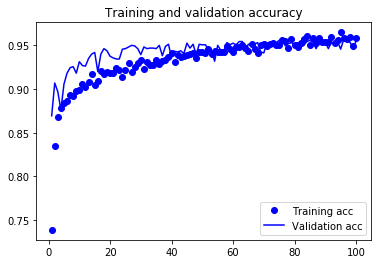

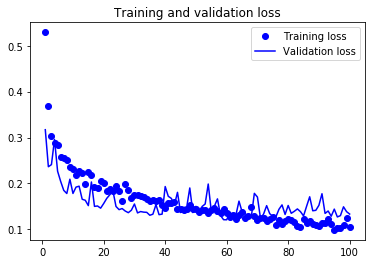

In [16]:
##output plots

acc_5 = history.history['acc']
val_acc_5 = history.history['val_acc']
loss_5 = history.history['loss']
val_loss_5 = history.history['val_loss']

epochs_5 = range(1, len(acc_5) + 1)
plt.plot(epochs_5, acc_5, 'bo', label='Training acc')
plt.plot(epochs_5, val_acc_5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_5, loss_5, 'bo', label='Training loss')
plt.plot(epochs_5, val_loss_5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
 
plt.plot(epochs_5,
         smooth_curve(acc_5), 'bo', label='Smoothed training acc')
plt.plot(epochs_5,
         smooth_curve(val_acc_5), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs_5,
         smooth_curve(loss_5), 'bo', label='Smoothed training loss')
plt.plot(epochs_5,
         smooth_curve(val_loss_5), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


NameError: name 'epochs_5' is not defined

In [193]:
accu_list = [val_acc_1, acc_1, val_acc_2, acc_2, val_acc_3, acc_3, val_acc_4, acc_4, val_acc_5, acc_5]
accu_array=np.array([np.array(xi) for xi in accu_list])
columns = ["val_acc_1", "acc_1", "val_acc_2", "acc_2", "val_acc_3", "acc_3", "val_acc_4", "acc_4", "val_acc_5", "acc_5"]
index = list(range(1, 101))
df = pd.DataFrame(data=accu_array.transpose(), index=index, columns=columns)
df.to_csv("accu_full.csv")

In [3]:
accu_data = pd.read_csv("accu_full.csv")
acc = accu_data.to_numpy().transpose()

C:\Users\deeplove\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:58: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


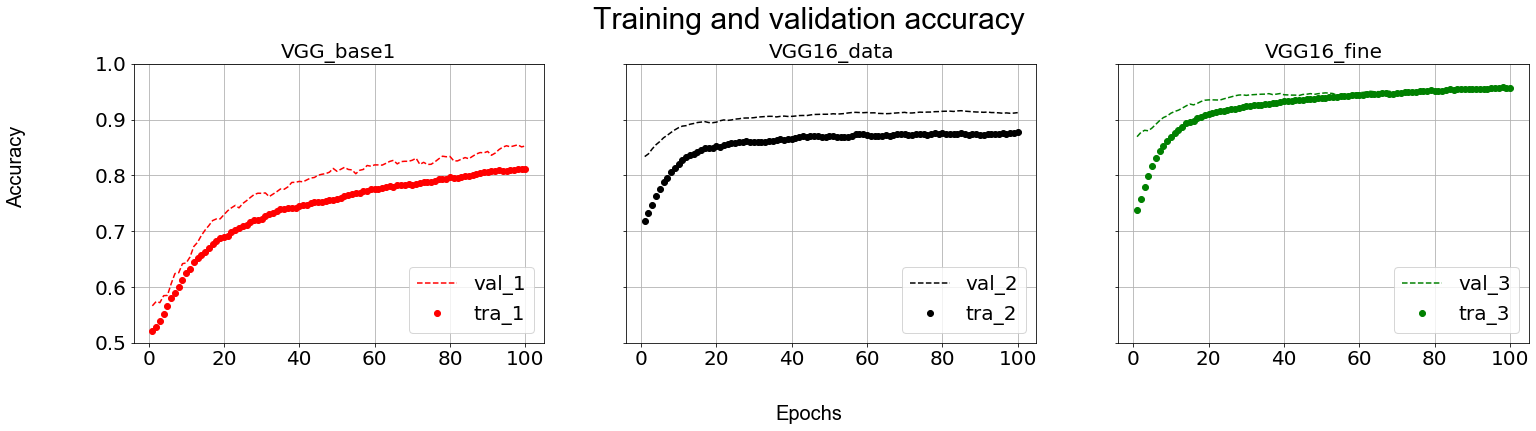

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(25,5), constrained_layout=True, sharey=True)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)



label_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

fig.suptitle('Training and validation accuracy', **title_font)
fig.text(0.5, -0.1, 'Epochs', ha='center', va='center', **label_font)
fig.text(0.06, 0.5, 'Accuracy', ha='center', va='center', rotation='vertical', **label_font)

#axes.ylabel('Accuracy')
#axes.grid(True)



ax1.plot(acc[0],
         smooth_curve(acc[3]), 'r--', label='val_1')
ax1.plot(acc[0],
         smooth_curve(acc[4]), 'ro', label='tra_1')
ax1.set_ylim(0.5,1.0)
ax1.legend(loc='lower right',  numpoints=1, fontsize=20)
ax1.grid(True)
ax1.set_title("VGG_base1", fontsize=20)


ax2.plot(acc[0],
         smooth_curve(acc[7]), 'k--', label='val_2')
ax2.plot(acc[0],
         smooth_curve(acc[8]), 'ko', label='tra_2')
ax2.set_ylim(0.5,1.0)
ax2.legend(loc='lower right',  numpoints=1, fontsize=20)
ax2.grid(True)
ax2.set_title("VGG16_data", fontsize=20)

ax3.plot(acc[0],
         smooth_curve(acc[9]), 'g--', label='val_3')
ax3.plot(acc[0],
         smooth_curve(acc[10]), 'go', label='tra_3')
ax3.set_ylim(0.5,1.0)
ax3.legend(loc='lower right',  numpoints=1, fontsize=20)
ax3.grid(True)
ax3.set_title("VGG16_fine", fontsize=20)


fig.subplots_adjust(top=0.9)


In [191]:
loss_list = [val_loss_1, loss_1, val_loss_2, loss_2, val_loss_3, loss_3, val_loss_4, loss_4, val_loss_5, loss_5]
loss_array=np.array([np.array(xi) for xi in loss_list])
columns = ["val_loss_1", "loss_1", "val_loss_2", "loss_2", "val_loss_3", "loss_3", "val_loss_4", "loss_4", "val_loss_5", "loss_5"]
index = list(range(1, 101))
df = pd.DataFrame(data=loss_array.transpose(), index=index, columns=columns)
df.to_csv("loss_full.csv")

In [7]:
loss_data = pd.read_csv("loss_full.csv")
los = loss_data.to_numpy().transpose()

C:\Users\deeplove\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:60: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


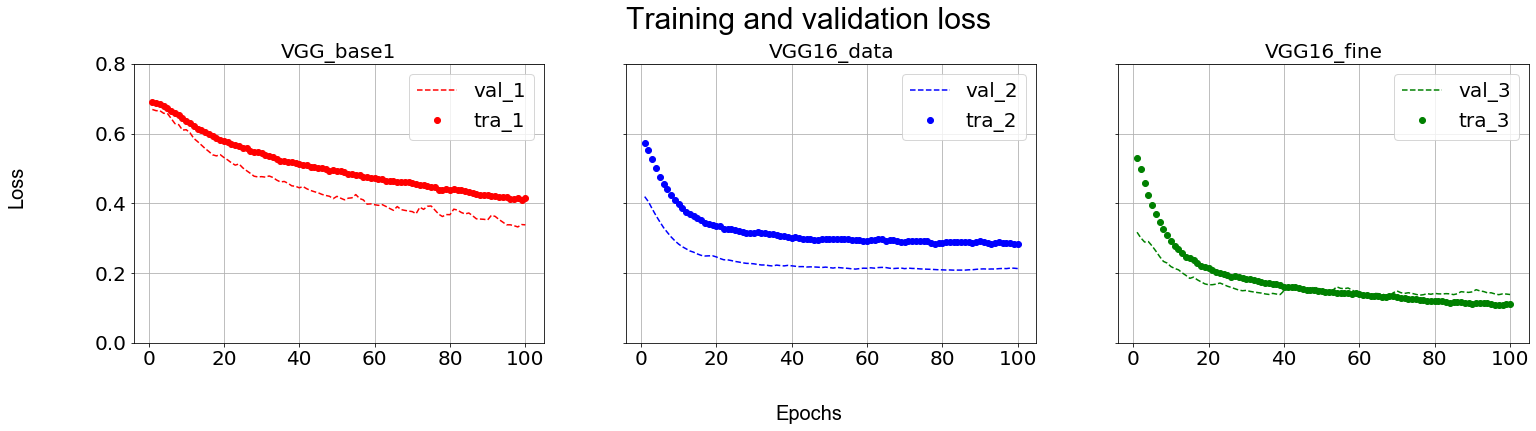

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(25,5), constrained_layout=True, sharey=True)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)



label_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

fig.suptitle('Training and validation loss', **title_font)
fig.text(0.5, -0.1, 'Epochs', ha='center', va='center', **label_font)
fig.text(0.06, 0.5, 'Loss', ha='center', va='center', rotation='vertical', **label_font)

#axes.ylabel('Accuracy')
#axes.grid(True)

y_low = 0.0
y_high = 0.8

ax1.plot(los[0],
         smooth_curve(los[3]), 'r--', label='val_1')
ax1.plot(los[0],
         smooth_curve(los[4]), 'ro', label='tra_1')
ax1.set_ylim(y_low,y_high)
ax1.legend(loc='upper right',  numpoints=1, fontsize=20)
ax1.grid(True)
ax1.set_title("VGG_base1", fontsize=20)

ax2.plot(los[0],
         smooth_curve(los[7]), 'b--', label='val_2')
ax2.plot(los[0],
         smooth_curve(los[8]), 'bo', label='tra_2')
ax2.set_ylim(y_low,y_high)
ax2.legend(loc='upper right',  numpoints=1, fontsize=20)
ax2.grid(True)
ax2.set_title("VGG16_data", fontsize=20)

ax3.plot(los[0],
         smooth_curve(los[9]), 'g--', label='val_3')
ax3.plot(los[0],
         smooth_curve(los[10]), 'go', label='tra_3')
ax3.set_ylim(y_low,y_high)
ax3.legend(loc='upper right',  numpoints=1, fontsize=20)
ax3.grid(True)
ax3.set_title("VGG16_fine", fontsize=20)




fig.subplots_adjust(top=0.9)


In [2]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [3]:
accu_data = pd.read_csv("accu_full.csv")
acc = accu_data.to_numpy().transpose()
loss_data = pd.read_csv("loss_full.csv")
los = loss_data.to_numpy().transpose()

Text(0.5, 0, 'Epochs')

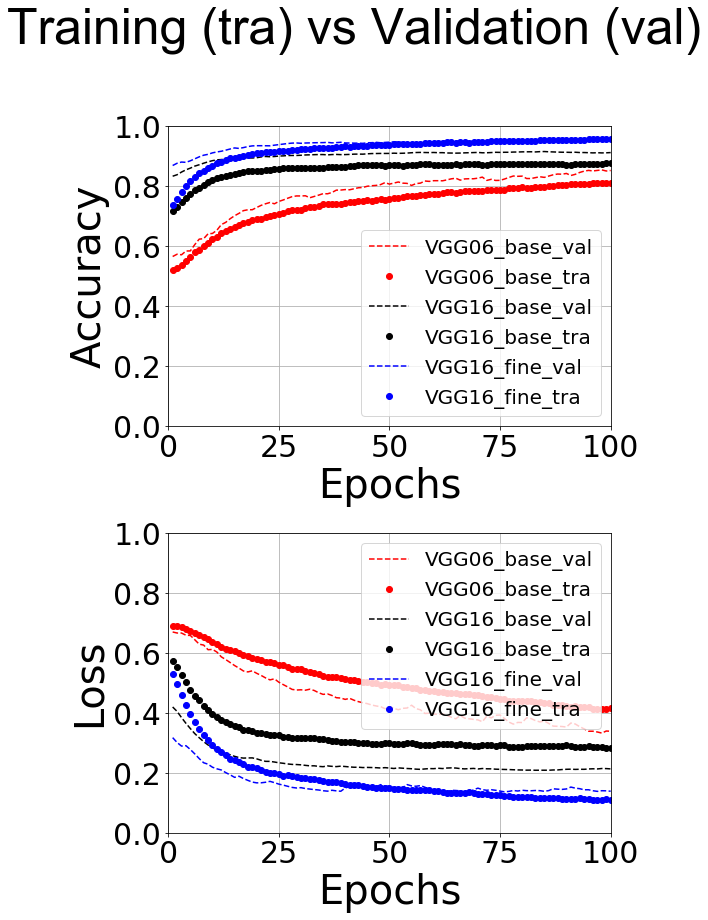

In [10]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,12), constrained_layout=True, sharey=False)

ax1 = axes[0]
ax2 = axes[1]

label_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

fig.suptitle('Training (tra) vs Validation (val)', **title_font, fontsize=50)

ax1.plot(acc[0],
         smooth_curve(acc[3]), 'r--', label='VGG06_base_val')
ax1.plot(acc[0],
         smooth_curve(acc[4]), 'ro', label='VGG06_base_tra')
ax1.plot(acc[0],
         smooth_curve(acc[7]), 'k--', label='VGG16_base_val')
ax1.plot(acc[0],
         smooth_curve(acc[8]), 'ko', label='VGG16_base_tra')
ax1.plot(acc[0],
         smooth_curve(acc[9]), 'b--', label='VGG16_fine_val')
ax1.plot(acc[0],
         smooth_curve(acc[10]), 'bo', label='VGG16_fine_tra')

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_ylim(0.0,1.0)
ax1.set_xlim(0,100)
ax1.legend(loc='lower right',  numpoints=1, fontsize=20)
ax1.grid(True)
ax1.set_ylabel("Accuracy", fontsize=40)
ax1.set_xlabel("Epochs", fontsize=40)

ax2.plot(los[0],
         smooth_curve(los[3]), 'r--', label='VGG06_base_val')
ax2.plot(los[0],
         smooth_curve(los[4]), 'ro', label='VGG06_base_tra')
ax2.plot(los[0],
         smooth_curve(los[7]), 'k--', label='VGG16_base_val')
ax2.plot(los[0],
         smooth_curve(los[8]), 'ko', label='VGG16_base_tra')
ax2.plot(los[0],
         smooth_curve(los[9]), 'b--', label='VGG16_fine_val')
ax2.plot(los[0],
         smooth_curve(los[10]), 'bo', label='VGG16_fine_tra')

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_ylim(0.0,1.0)
ax2.set_xlim(0,100)
ax2.legend(loc='upper right',  numpoints=1, fontsize=20)
ax2.grid(True)
ax2.set_ylabel("Loss", fontsize=40)
ax2.set_xlabel("Epochs", fontsize=40)
